In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Name / Data Type / Measurement Unit / Description

# Sex / nominal / -- / M, F, and I (infant)
# Length / continuous / mm / Longest shell measurement
# Diameter / continuous / mm / perpendicular to length
# Height / continuous / mm / with meat in shell
# Whole weight / continuous / grams / whole abalone
# Shucked weight / continuous / grams / weight of meat
# Viscera weight / continuous / grams / gut weight (after bleeding)
# Shell weight / continuous / grams / after being dried
# Rings / integer / -- / +1.5 gives the age in years

In [3]:
cols = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
df = pd.read_csv("abalone.data", header = None, names = cols)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [6]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


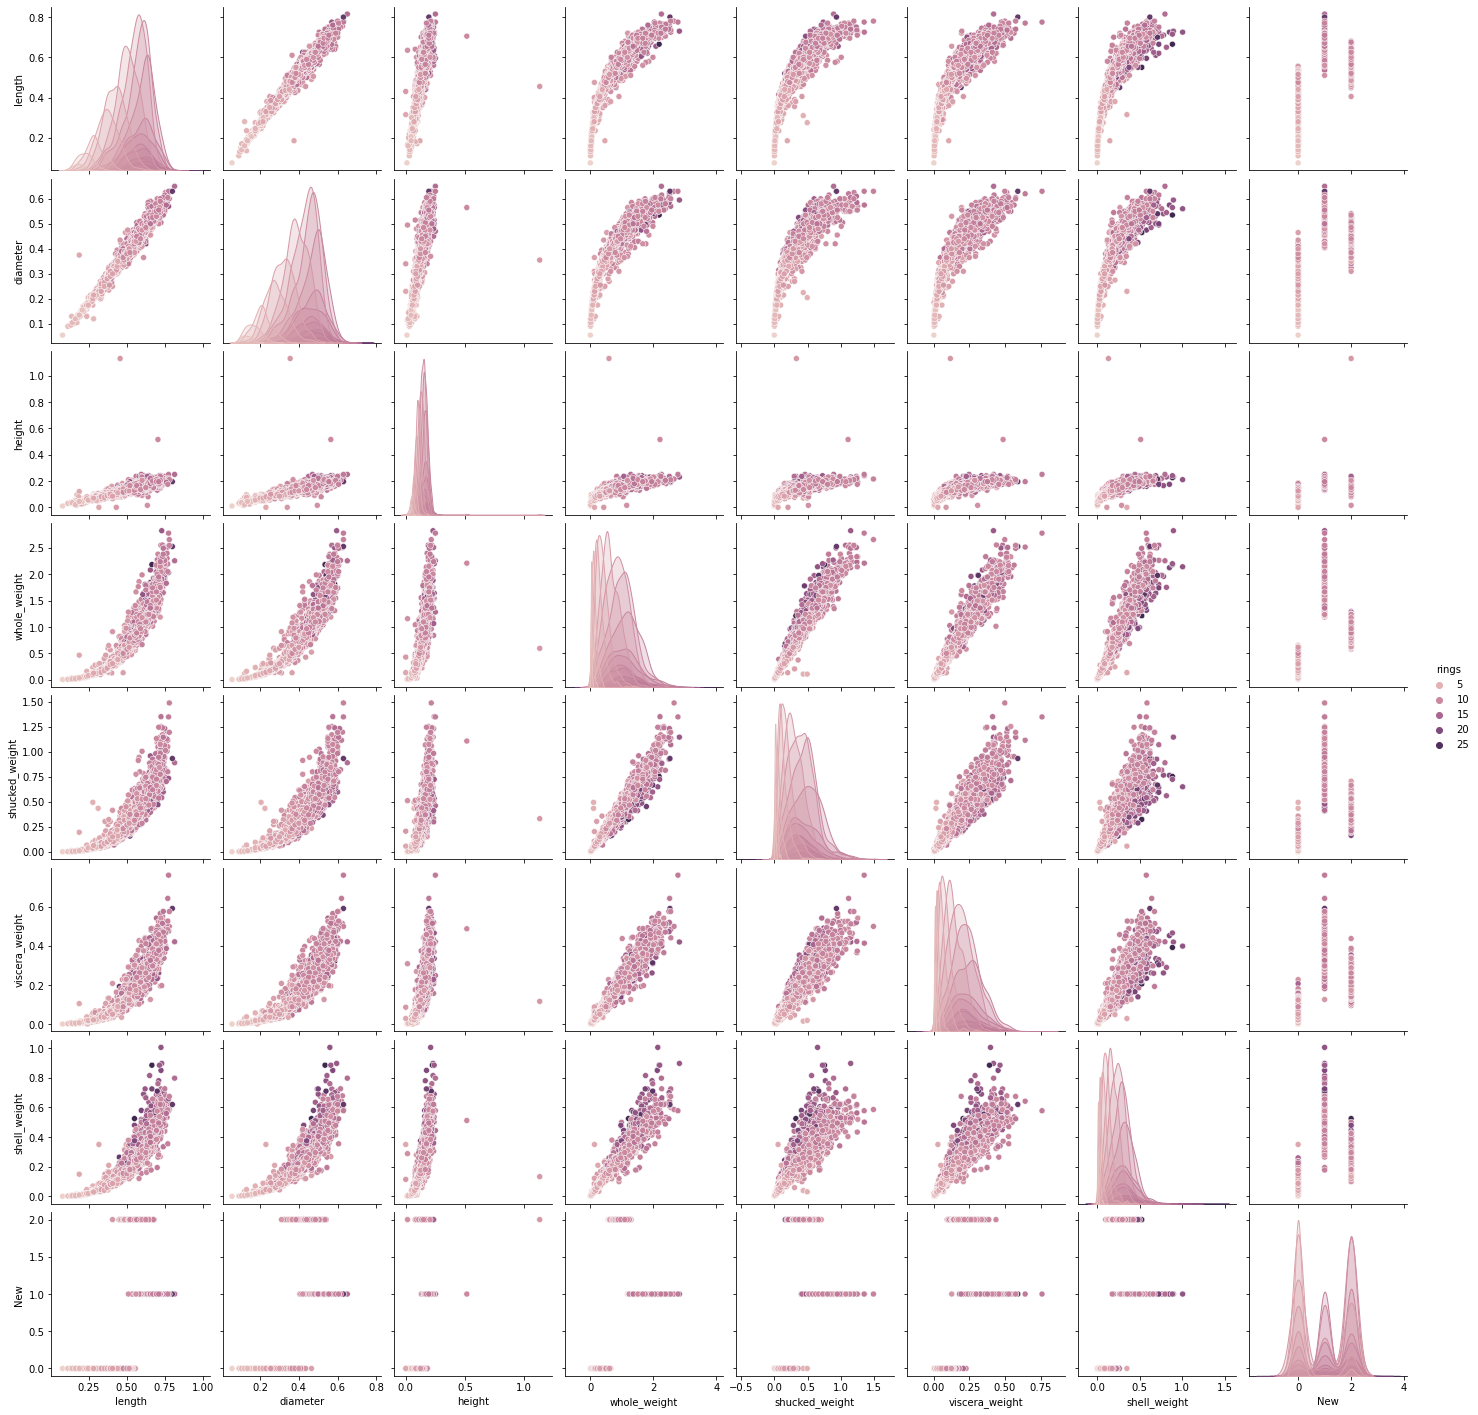

In [43]:
sns.pairplot(data=df,hue='rings')

In [9]:
x=df.iloc[:,1:-1].values

In [10]:
x

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [11]:
import scipy.cluster.hierarchy as sch

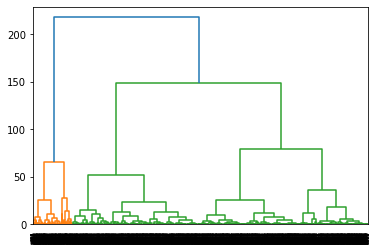

In [44]:
lk = sch.linkage(x, method="ward")
ddg = sch.dendrogram(lk)

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1449.7483798303804,
 502.99609559196887,
 271.3738401788805,
 173.20339869953298,
 123.9082676232213,
 95.5990468730553,
 78.3461754613776,
 66.49131244681028,
 59.09548666205616,
 52.982643666564734]

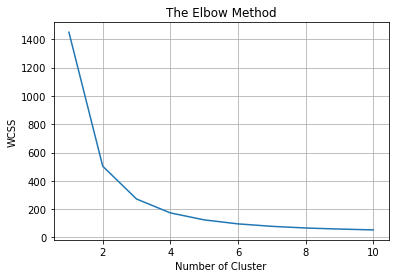

In [16]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")         
plt.grid(True)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
yhc = kmeans.fit_predict(x)

In [18]:
yhc[:100]

array([0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0])

In [19]:
kmeans.cluster_centers_

array([[0.40136307, 0.30617904, 0.10223643, 0.34346538, 0.14762165,
        0.07472208, 0.10473456],
       [0.66385159, 0.5235159 , 0.18419906, 1.55137574, 0.67971319,
        0.33666431, 0.43190754],
       [0.56911304, 0.44547826, 0.15216812, 0.92403652, 0.39847188,
        0.20216348, 0.26841594]])

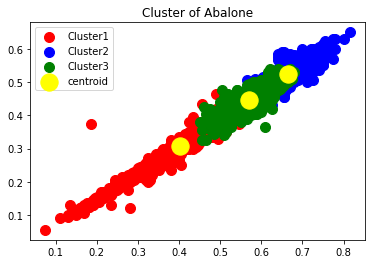

In [20]:
plt.scatter(x[yhc==0,0], x[yhc==0,1], s=100, c="red", label="Cluster1")
plt.scatter(x[yhc==1,0], x[yhc==1,1], s=100, c="blue",label="Cluster2")
plt.scatter(x[yhc==2,0], x[yhc==2,1], s=100, c="green",label="Cluster3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="centroid")

plt.legend()
plt.title('Cluster of Abalone')
plt.show()

In [21]:
df["New"] = yhc

In [22]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,New
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [27]:
models = []
models.append(("KNN     -:", KNeighborsClassifier()))
models.append(("Logreg  -:", LogisticRegression()))
models.append(("SVM     -:", SVC()))
models.append(("DT      -:", DecisionTreeClassifier()))

accuracy=[]

for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    accuracy.append(round(ac*100))
    
    print(name)
    print(classification_report(ytest, ypred))
    print()


print(f"Avg. Ensemble Acurracy-: {np.array(accuracy).mean()} %")
    
    

KNN     -:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       327
           1       0.96      0.98      0.97       169
           2       0.97      0.98      0.97       340

    accuracy                           0.98       836
   macro avg       0.98      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836


Logreg  -:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       327
           1       1.00      0.96      0.98       169
           2       0.98      0.99      0.99       340

    accuracy                           0.99       836
   macro avg       0.99      0.98      0.99       836
weighted avg       0.99      0.99      0.99       836


SVM     -:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       327
           1       1.00      0.72      0.84       169
           2       0.83      0.98      0

In [28]:
accuracy

[98, 99, 91, 98]

# 1. Hard Voting

In [29]:
from sklearn.ensemble import VotingClassifier

In [30]:
models = [
    ("Logreg    -:", LogisticRegression()),
    ("DT-g      -:", DecisionTreeClassifier()),
    ("DT-e      -:", DecisionTreeClassifier(criterion="entropy"))
]

In [31]:
vch = VotingClassifier(estimators = models)
vch.fit(xtrain, ytrain)
ypred = vch.predict(xtest)

In [32]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       327
           1       0.99      0.99      0.99       169
           2       0.99      0.99      0.99       340

    accuracy                           0.99       836
   macro avg       0.99      0.99      0.99       836
weighted avg       0.99      0.99      0.99       836



# 2. SoftVoting

In [33]:
vcs = VotingClassifier(estimators = models, voting="soft")
vcs.fit(xtrain, ytrain)
ypred = vcs.predict(xtest)

In [34]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       327
           1       0.99      0.99      0.99       169
           2       0.99      0.99      0.99       340

    accuracy                           0.99       836
   macro avg       0.99      0.99      0.99       836
weighted avg       0.99      0.99      0.99       836



# Boostrap Aggregation

In [35]:
from sklearn.ensemble import BaggingClassifier

In [45]:
bg = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, random_state=1)
bg.fit(xtrain, ytrain)
ypred = bg.predict(xtest)

In [46]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       327
           1       1.00      0.64      0.78       169
           2       0.80      0.96      0.87       340

    accuracy                           0.89       836
   macro avg       0.92      0.85      0.87       836
weighted avg       0.90      0.89      0.88       836



# Bagging

In [50]:
bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, random_state=0)
bg.fit(xtrain, ytrain)
ypred = bg.predict(xtest)

In [51]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       327
           1       0.98      0.98      0.98       169
           2       0.97      0.99      0.98       340

    accuracy                           0.99       836
   macro avg       0.99      0.98      0.98       836
weighted avg       0.99      0.99      0.99       836



# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(max_samples=100, random_state=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [49]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       327
           1       0.99      0.98      0.98       169
           2       0.98      0.99      0.99       340

    accuracy                           0.99       836
   macro avg       0.99      0.99      0.99       836
weighted avg       0.99      0.99      0.99       836

